In [2]:
import numpy as np
import pandas as pd
import tabulate
import matplotlib.pyplot as plt

plt.rc('font', family='arial')
plt.rc('pdf', fonttype = 42)
plt.rc('ps', fonttype = 42)

In [1]:
cd ..

d:\min\research_projects\FedImpute


d:\min\research_projects\FedImpute\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Load Data

In [3]:
%load_ext autoreload
%autoreload 2

from fedimpute.data_prep import load_data, display_data
data, data_config = load_data("codrna")
display_data(data)
print("Data Dimensions: ", data.shape)
print("Data Config:\n", data_config)

+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|   X1   |   X2   |   X3   |   X4   |   X5   |   X6   |   X7   |   X8   |   y    |
|--------+--------+--------+--------+--------+--------+--------+--------+--------|
| 0.7554 | 0.1364 | 0.0352 | 0.4132 | 0.6937 | 0.1591 | 0.3329 | 0.7154 | 1.0000 |
| 0.7334 | 0.7879 | 0.3819 | 0.3693 | 0.5619 | 0.4830 | 0.4351 | 0.5160 | 0.0000 |
| 0.7752 | 0.1364 | 0.1761 | 0.3290 | 0.7410 | 0.4259 | 0.4644 | 0.5268 | 1.0000 |
| 0.5905 | 0.7424 | 0.2720 | 0.2898 | 0.6920 | 0.3205 | 0.4019 | 0.6290 | 1.0000 |
| 0.7366 | 0.1212 | 0.2465 | 0.3290 | 0.7410 | 0.3249 | 0.5086 | 0.5631 | 1.0000 |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+
Data Dimensions:  (5000, 9)
Data Config:
 {'target': 'y', 'task_type': 'classification', 'natural_partition': False}


# Scenario Simulation

## Basic Usage

In [4]:
%load_ext autoreload
%autoreload 2
from fedimpute.scenario import ScenarioBuilder

scenario_builder = ScenarioBuilder()
scenario_data = scenario_builder.create_simulated_scenario(
    data, data_config, num_clients = 4, dp_strategy='iid-even', ms_scenario='mnar-heter'
)
print('Results Structure (Dict Keys):')
print(list(scenario_data.keys()))
scenario_builder.summarize_scenario()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Missing data simulation...
Results Structure (Dict Keys):
['clients_train_data', 'clients_test_data', 'clients_train_data_ms', 'clients_seeds', 'global_test_data', 'data_config', 'stats']
Scenario Summary
Total clients: 4
Global Test Data: (500, 9)
Missing Mechanism Category: MNAR (Self Masking Logit)
Clients Data Summary:
     Train     Test      Miss     MS Ratio    MS Feature    Seed
--  --------  -------  --------  ----------  ------------  ------
C1  (1125,9)  (113,9)  (1125,8)     0.47         8/8        6077
C2  (1125,9)  (113,9)  (1125,8)     0.51         8/8        577
C3  (1125,9)  (113,9)  (1125,8)     0.46         8/8        7231
C4  (1125,9)  (113,9)  (1125,8)     0.47         8/8        5504



## Exploring Scenario


### Data Heterogeneity


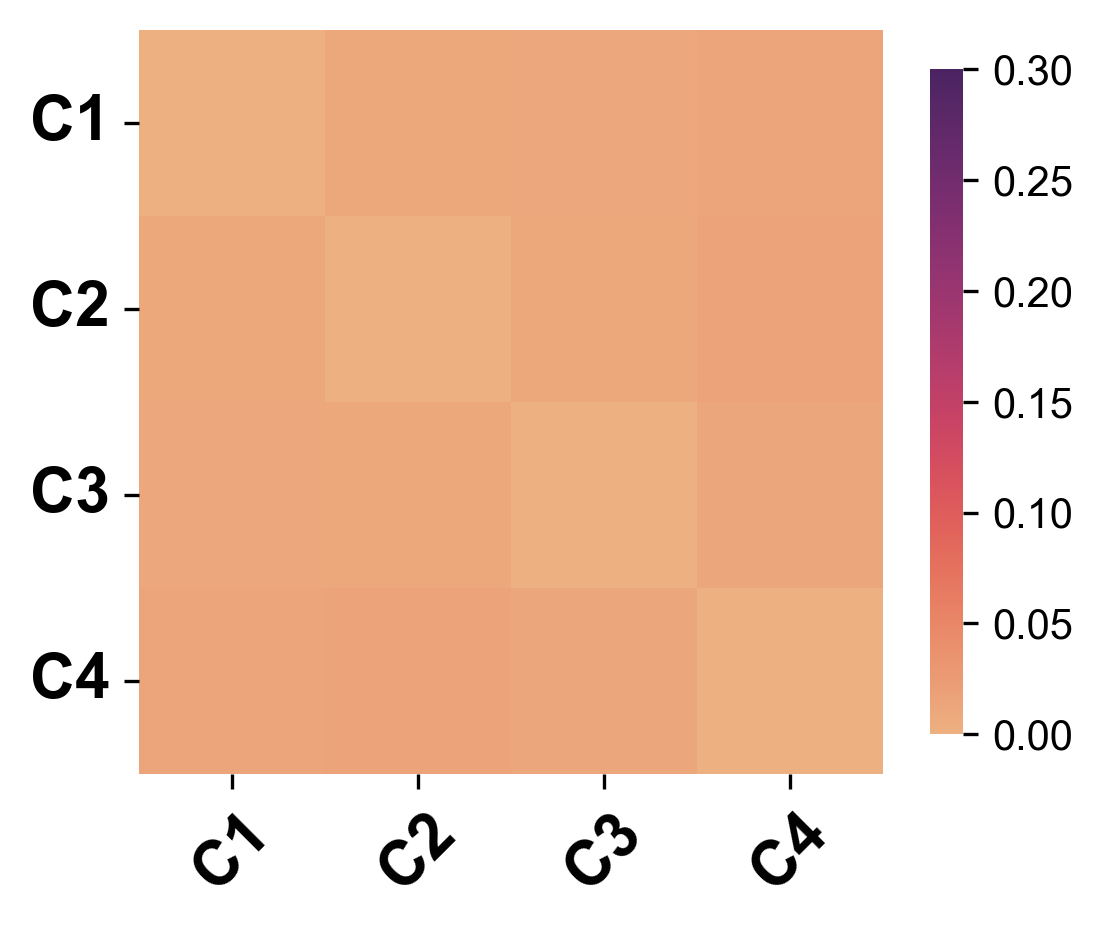

In [5]:
scenario_builder.visualize_data_heterogeneity(
    client_ids=[0, 1, 2, 3], 
    distance_method='swd',
    pca_col_threshold=20,
    fontsize=18,
    title=False,
    save_path='./plots/data_heterogeneity.svg'
)

### Missing Data Inspection


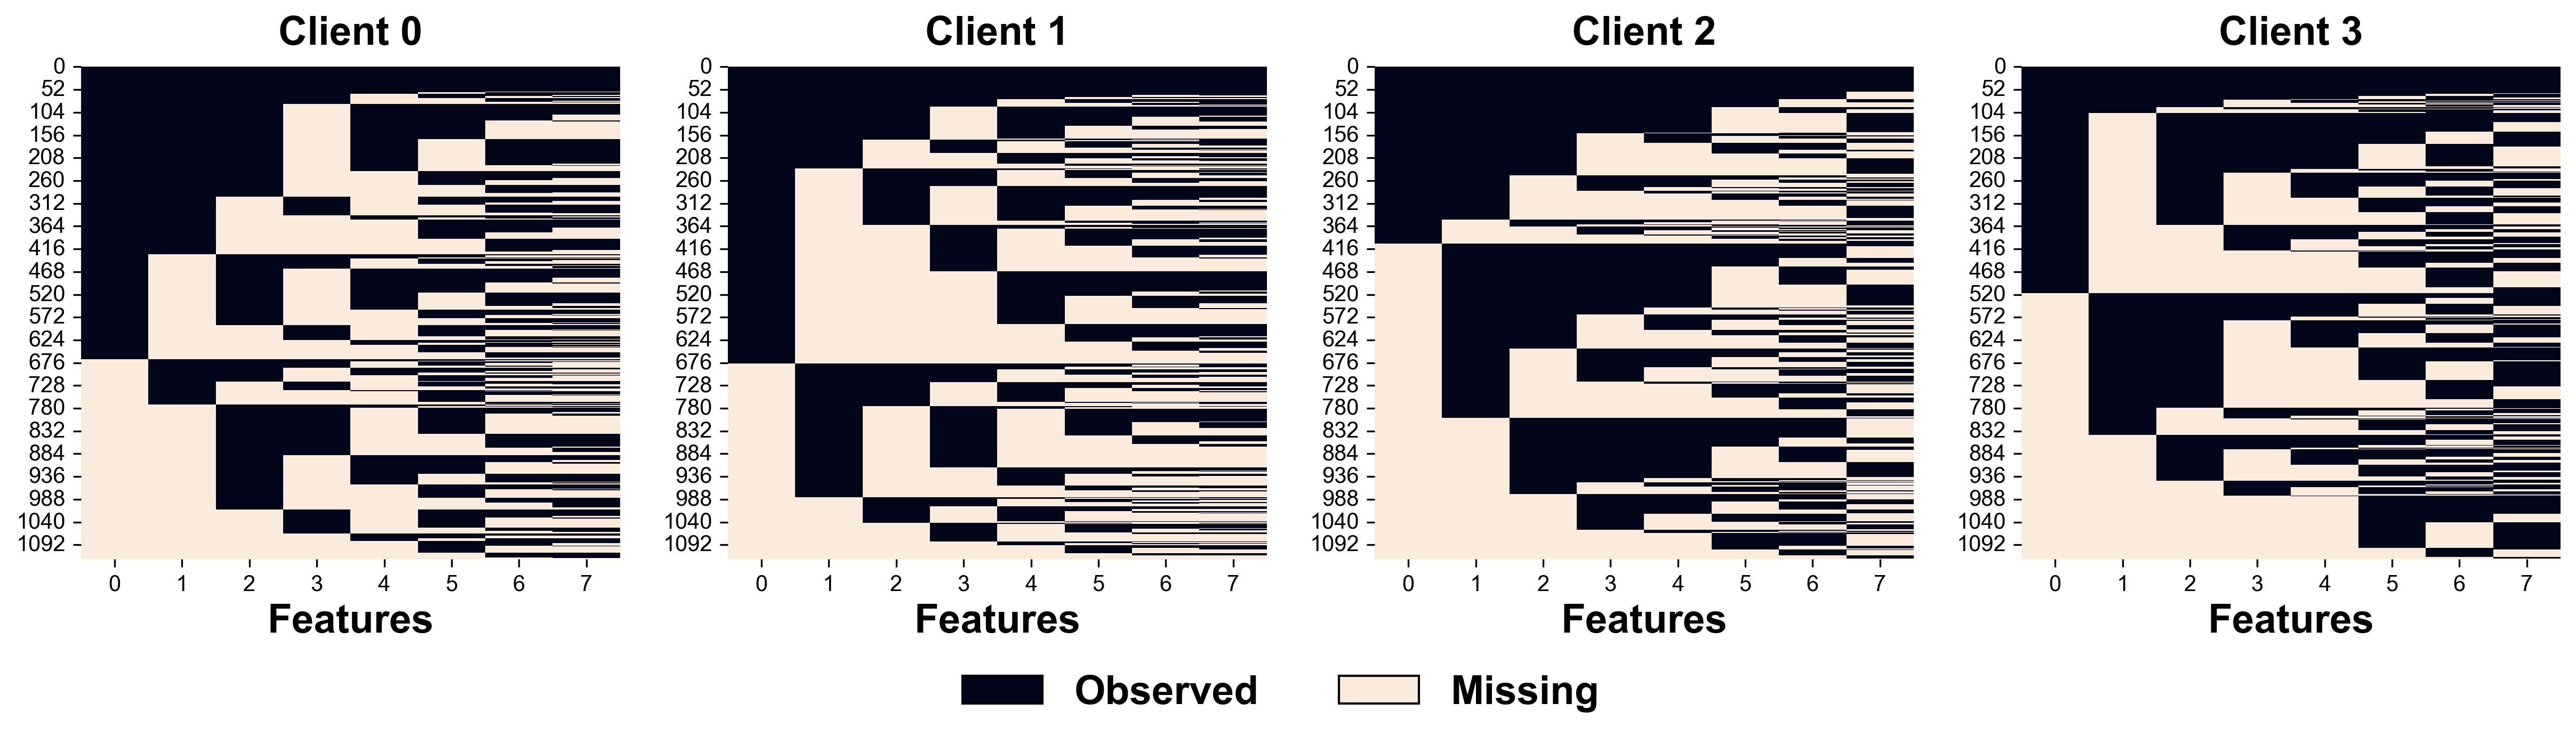

In [6]:
scenario_builder.visualize_missing_pattern(client_ids=[0, 1, 2, 3], save_path='./plots/ms_pattern.pdf')

In [7]:
scenario_builder.visualize_missing_distribution(
    client_ids = [0, 1], feature_ids = [0, 1, 2, 3, 4],
    stat = 'proportion', bins = 20, kde=True,
    save_path='./plots/ms_distribution.pdf'
)

# Running Federated Imputation

## Basic Usage

In [24]:
%load_ext autoreload
%autoreload 2
from fedimpute.execution_environment import FedImputeEnv

env = FedImputeEnv(debug_mode=False)
env.configuration(imputer = 'mice', fed_strategy='fedmice')
env.setup_from_scenario_builder(scenario_builder = scenario_builder, verbose=1)
env.show_env_info()
env.run_fed_imputation(verbose=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Setting up clients...
Setting up server...
Setting up workflow...
Environment setup complete.
Environment Information:
Workflow: ICE (Imputation via Chain Equation)
Clients:
 - Client 0: imputer: mice, fed-strategy: fedmice
 - Client 1: imputer: mice, fed-strategy: fedmice
 - Client 2: imputer: mice, fed-strategy: fedmice
 - Client 3: imputer: mice, fed-strategy: fedmice
Server: fed-strategy: fedmice

Imputation Start ...
Initial: imp_rmse: 0.1664 imp_ws: 0.0831 


ICE Iterations:   0%|          | 0/20 [00:00<?, ?it/s]

Feature_idx:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 0: loss: 0.0063


Feature_idx:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 1: loss: 0.0034


Feature_idx:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 2: loss: 0.0029


Feature_idx:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 3: loss: 0.0027


Feature_idx:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 4: loss: 0.0026


Feature_idx:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 5: loss: 0.0026


Feature_idx:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 6: loss: 0.0026


Feature_idx:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 7: loss: 0.0026


Feature_idx:   0%|          | 0/8 [00:00<?, ?it/s]

Epoch 8: loss: 0.0026
All clients converged, iteration 8
Final: imp_rmse: 0.1530 imp_ws: 0.0687 
Finished. Running time: 6.2112 seconds


## Monitoring Imputation Progress


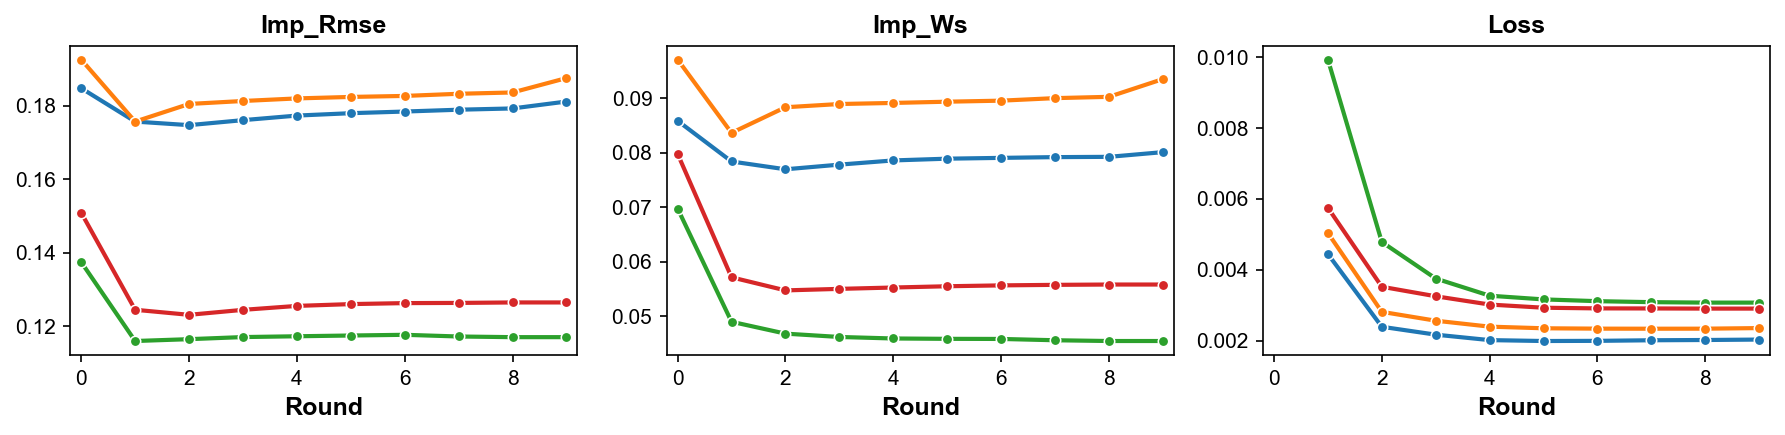

In [25]:
env.tracker.visualize_imputation_process()

# Evaluation

### Imputation Quality

In [26]:
%load_ext autoreload
%autoreload 2
from fedimpute.evaluation import Evaluator

X_trains = env.get_data(client_ids='all', data_type = 'train')
X_train_imps = env.get_data(client_ids='all', data_type = 'train_imp')
X_train_masks = env.get_data(client_ids='all', data_type = 'train_mask')

evaluator = Evaluator()
ret = evaluator.evaluate_imp_quality(
    X_train_imps = X_train_imps,
    X_train_origins = X_trains,
    X_train_masks = X_train_masks,
    metrics = ['rmse', 'nrmse', 'sliced-ws']
)
evaluator.show_imp_results()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Imputation Quality
               rmse       nrmse      sliced-ws
----------  ----------  ----------  -----------
 Client 1     0.181       0.505        0.080
 Client 2     0.187       0.543        0.094
 Client 3     0.117       0.325        0.045
 Client 4     0.126       0.354        0.056
----------  ----------  ----------  ----------
 Average      0.153       0.432        0.069
   Std        0.032       0.094        0.019


Evaluating TSNE for Client 1 ...
Evaluating TSNE for Client 2 ...
Evaluating TSNE for Client 3 ...
Evaluating TSNE for Client 4 ...


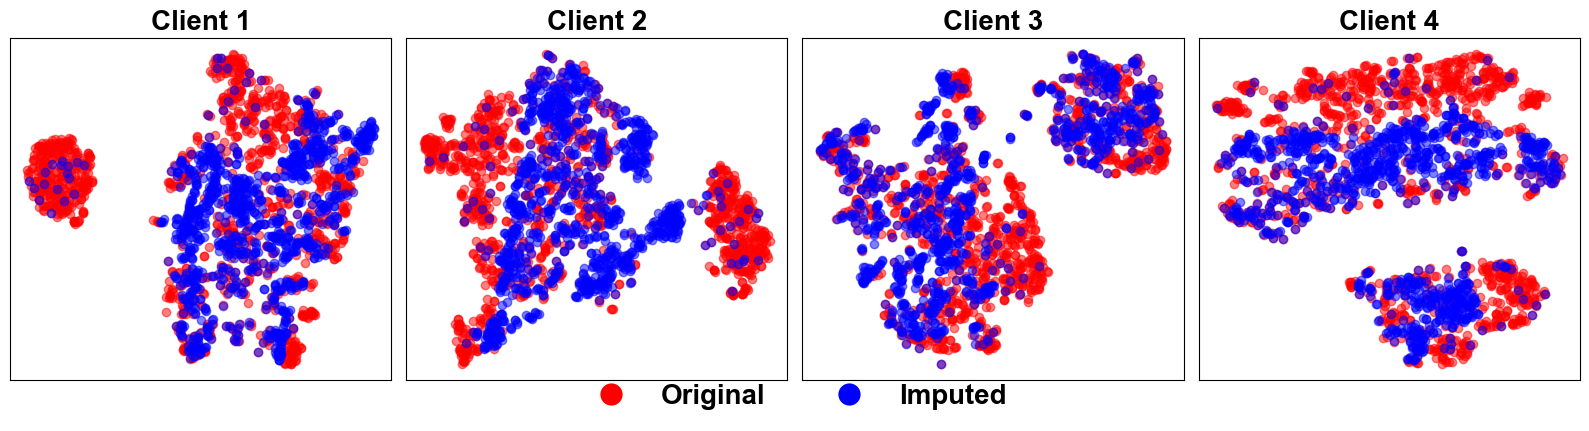

In [27]:
X_trains = env.get_data(client_ids='all', data_type = 'train')
X_train_imps = env.get_data(client_ids='all', data_type = 'train_imp')

evaluator.tsne_visualization(
    X_imps = X_train_imps,
    X_origins = X_trains,
    seed = 0
)

### Local Prediction

In [28]:
X_train_imps, y_trains = env.get_data(client_ids='all', data_type = 'train_imp', include_y=True)
X_tests, y_tests = env.get_data(client_ids='all', data_type = 'test', include_y=True)
X_global_test, y_global_test = env.get_data(data_type = 'global_test', include_y = True)
data_config = env.get_data(data_type = 'config')

In [31]:
ret = evaluator.run_local_prediction(
    X_train_imps = X_train_imps,
    y_trains = y_trains,
    X_tests = X_tests,
    y_tests = y_tests,
    data_config = data_config,
    model = 'rf',
    seed= 0
)
evaluator.show_local_prediction_results()

Clients:   0%|          | 0/4 [00:00<?, ?it/s]

Downstream Prediction (Local)
             accuracy       f1         auc         prc
----------  ----------  ----------  ----------  ----------
 Client 1     0.894       0.842       0.975       0.946
 Client 2     0.965       0.946       0.996       0.992
 Client 3     0.956       0.932       0.982       0.975
 Client 4     0.920       0.873       0.961       0.924
----------  ----------  ----------  ----------  ----------
 Average      0.934       0.898       0.979       0.959
   Std        0.028       0.042       0.013       0.026


In [35]:
ret = evaluator.run_local_prediction(
    X_train_imps = X_train_imps,
    y_trains = y_trains,
    X_tests = X_tests,
    y_tests = y_tests,
    data_config = data_config,
    model = 'lr',
    seed= 0
)
evaluator.show_local_prediction_results()

Clients:   0%|          | 0/4 [00:00<?, ?it/s]

Downstream Prediction (Local)
             accuracy       f1         auc         prc
----------  ----------  ----------  ----------  ----------
 Client 1     0.903       0.871       0.990       0.977
 Client 2     0.903       0.845       0.962       0.935
 Client 3     0.850       0.809       0.950       0.911
 Client 4     0.823       0.778       0.973       0.968
----------  ----------  ----------  ----------  ----------
 Average      0.869       0.826       0.968       0.948
   Std        0.034       0.035       0.015       0.027


### Federated Prediction

In [30]:
ret = evaluator.run_fed_prediction(
    X_train_imps = X_train_imps,
    y_trains = y_trains,
    X_tests = X_tests,
    y_tests = y_tests,
    X_test_global = X_global_test,
    y_test_global = y_global_test,
    data_config = data_config,
    model_name = 'rf',
    seed= 0
)

evaluator.show_fed_prediction_results()

Downstream Prediction (Fed)
 Personalized    accuracy       f1         auc         prc
--------------  ----------  ----------  ----------  ----------
   Client 1       0.956       0.932       0.988       0.962
   Client 2       0.956       0.930       0.995       0.989
   Client 3       0.956       0.932       0.995       0.989
   Client 4       0.876       0.800       0.969       0.943
  ----------    ----------  ----------  ----------  ----------
    Global        0.914       0.862       0.952       0.906


In [36]:
ret = evaluator.run_fed_prediction(
    X_train_imps = X_train_imps,
    y_trains = y_trains,
    X_tests = X_tests,
    y_tests = y_tests,
    X_test_global = X_global_test,
    y_test_global = y_global_test,
    data_config = data_config,
    model_name = 'lr',
    seed= 0
)

evaluator.show_fed_prediction_results()

(900, 8) (900,)


                                                                4.51it/s]

Downstream Prediction (Fed)
 Personalized    accuracy       f1         auc         prc
--------------  ----------  ----------  ----------  ----------
   Client 1       0.912       0.878       0.982       0.955
   Client 2       0.920       0.892       0.996       0.992
   Client 3       0.903       0.867       0.968       0.947
   Client 4       0.876       0.833       0.972       0.960
  ----------    ----------  ----------  ----------  ----------
    Global        0.912       0.878       0.979       0.953


### All In One

In [34]:
%load_ext autoreload
%autoreload 2
from fedimpute.evaluation import Evaluator

evaluator = Evaluator()
ret = evaluator.evaluate_all(
    env, metrics = ['imp_quality', 'pred_downstream_local', 'pred_downstream_fed']
)
evaluator.show_results_all()

Evaluating imputation quality...
Imputation quality evaluation completed.
Evaluating downstream prediction...


Clients:   0%|          | 0/4 [00:00<?, ?it/s]

Early stopping at epoch 593
Early stopping at epoch 287
Early stopping at epoch 583
Early stopping at epoch 360
Downstream prediction evaluation completed.
Evaluating federated downstream prediction...


Global Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0 - average loss: 0.6716053117724026
Epoch 10 - average loss: 0.5709273157750859
Epoch 20 - average loss: 0.48411076998009406
Epoch 30 - average loss: 0.4436344894416192
Epoch 40 - average loss: 0.43356676005265293
Epoch 50 - average loss: 0.4266376635607551
Epoch 60 - average loss: 0.4221082873204175
Early stopping at epoch 65
Epoch 70 - average loss: 0.40617619396424764
Early stopping at epoch 71
Early stopping at epoch 74
Epoch 80 - average loss: 0.3788260501973769
Early stopping at epoch 81
Early stopping at epoch 100
Early stopping at epoch 121
Early stopping at epoch 125
Federated downstream prediction evaluation completed.
Evaluation completed.


imp_quality                     pred_downstream_local                      \
         rmse     nrmse sliced-ws              accuracy        f1       auc   
0    0.172028  0.479522  0.075509              0.787611  0.636364  0.860953   
1    0.184269  0.533933  0.090226              0.893805  0.823529  0.952703   
2    0.119754  0.331969  0.047390              0.929204  0.894737  0.975818   
3    0.128211  0.359113  0.057849              0.752212  0.481481  0.854196   

              pred_downstream_fed                                   \
        prc personalized_accuracy personalized_f1 personalized_auc   
0  0.741470              0.884956        0.831169         0.958037   
1  0.934722              0.920354        0.883117         0.981508   
2  0.969489              0.884956        0.835443         0.975462   
3  0.760059              0.867257        0.819277         0.972617   

                                                                    
  personalized_prc global_accuracy global_f1 global_auc global_prc  
0         0.900117           0.906   0.86217   0.968807    0.94098  
1         0.956229           0.906   0.86217   0.968807    0.94098  
2         0.951035           0.906   0.86217   0.968807    0.94098  
3         0.961279           0.906   0.86217   0.968807    0.94098

### Export Evaluation Results in Different Format

In [26]:
evaluator.export_results(format = 'dataframe')

imp_quality                     pred_downstream_local                      \
         rmse     nrmse sliced-ws              accuracy        f1       auc   
0    0.172028  0.479522  0.075509              0.787611  0.636364  0.860953   
1    0.184269  0.533933  0.090226              0.893805  0.823529  0.952703   
2    0.119754  0.331969  0.047390              0.929204  0.894737  0.975818   
3    0.128211  0.359113  0.057849              0.752212  0.481481  0.854196   

              pred_downstream_fed                                   \
        prc personalized_accuracy personalized_f1 personalized_auc   
0  0.741470              0.884956        0.831169         0.958037   
1  0.934722              0.920354        0.883117         0.981508   
2  0.969489              0.884956        0.835443         0.975462   
3  0.760059              0.867257        0.819277         0.972617   

                                                                    
  personalized_prc global_accuracy global_f1 global_auc global_prc  
0         0.900117           0.906   0.86217   0.968807    0.94098  
1         0.956229           0.906   0.86217   0.968807    0.94098  
2         0.951035           0.906   0.86217   0.968807    0.94098  
3         0.961279           0.906   0.86217   0.968807    0.94098

In [29]:
ret = evaluator.export_results(format = 'dict-dataframe')
ret['imp_quality']

,rmse,nrmse,sliced-ws
0,0.172028,0.479522,0.075509
1,0.184269,0.533933,0.090226
2,0.119754,0.331969,0.047390
3,0.128211,0.359113,0.057849


In [32]:
ret = evaluator.export_results(format = 'dict-dataframe')
ret['pred_downstream_fed']

,personalized_accuracy,personalized_f1,personalized_auc,personalized_prc,global_accuracy,global_f1,global_auc,global_prc
0,0.884956,0.831169,0.958037,0.900117,0.906,0.86217,0.968807,0.94098
1,0.920354,0.883117,0.981508,0.956229,0.906,0.86217,0.968807,0.94098
2,0.884956,0.835443,0.975462,0.951035,0.906,0.86217,0.968807,0.94098
3,0.867257,0.819277,0.972617,0.961279,0.906,0.86217,0.968807,0.94098


# regression analysis

In [34]:
X_trains, y_trains = env.get_data(client_ids='all', data_type = 'train', include_y=True)
data_config = env.get_data(data_type = 'config')
data_config['task_type'] = 'classification'

ret = evaluator.run_local_regression_analysis(
    X_train_imps = X_train_imps,
    y_trains = y_trains,
    data_config = data_config
)

evaluator.show_local_regression_results(client_idx = 0)

                  Local Logit Regression Results (client 1)                   
Dep. Variable:                      y   No. Observations:                 1125
Model:                          Logit   Df Residuals:                     1116
Method:                           MLE   Df Model:                            8
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.2545
Time:                        15:01:59   Log-Likelihood:                -528.54
converged:                       True   LL-Null:                       -708.95
Covariance Type:            nonrobust   LLR p-value:                 4.432e-73
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.6797      4.807      9.919      0.000      38.258      57.101
X1           -82.3736      7.642    -10.779      0.000     -97.351     -67.396
X2           -19.5991      2.591     -7.563      0.0

In [33]:
X_trains, y_trains = env.get_data(client_ids='all', data_type = 'train', include_y=True)
data_config = env.get_data(data_type = 'config')
data_config['task_type'] = 'classification'

evaluator.run_fed_regression_analysis(
    X_train_imps = X_train_imps,
    y_trains = y_trains,
    data_config = data_config
)
evaluator.show_fed_regression_results()

                      Federated Logit Regression Result                       
Dep. Variable:                      y   No. Observations:                 4500
Model:                          Logit   Df Residuals:                     4491
Method:                           MLE   Df Model:                            8
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                  0.2478
Time:                        14:59:43   Log-Likelihood:                -2133.1
converged:                       True   LL-Null:                       -2835.8
Covariance Type:            nonrobust   LLR p-value:                4.035e-298
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4160      0.129    235.463      0.000      30.163      30.669
X1           -63.3583      0.231   -274.762      0.000     -63.810     -62.906
X2           -16.1744      0.064   -254.610      0.0